# Analysis of the dataset consisting of all leagues

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I did the analysis of the dataset to find out the differences between leagues. I focused on the percentages of home wins, draws, and away wins, and on the distribution of goal differences.

In [ ]:
# Creates dataset from given files with results and goals.
#
# files - files with statistics to create the dataset from
#
# Returns the created dataset.
def get_dataset(files):
  season_datasets = []
  for file in files:
    season_dataset = pd.read_csv(file, encoding='windows-1252')
    season_dataset = season_dataset[['FTR', 'FTHG', 'FTAG']]
    season_datasets.append(season_dataset)
  dataset = pd.concat(season_datasets)
  dataset['FTR'].replace('H', 1, inplace=True)
  dataset['FTR'].replace('A', 0, inplace=True)
  dataset['FTR'].replace('D', 2, inplace=True)
  return dataset

In [ ]:
# Calculates home win, draw and away win percentages from given dataset.
#
# dataset - dataset to calculate the percentages from
#
# Returns percentage of home wins, draws and away wins.
def get_percentages(dataset):
  results = dataset['FTR'].value_counts()
  sum = dataset['FTR'].shape[0]
  return results[1] / sum, results[2] / sum, results[0] / sum

In [ ]:
# Calculates home win, draw and away win percentages for each year from given
# files.
#
# files - files with statistics to calculate the percentages from
#
# Returns yearly percentage of home wins, draws and away wins.
def get_percentages_yearly(files):
  home_win_percentages = []
  draw_percentages = []
  away_win_percentages = []
  for file in files:
    season_dataset = pd.read_csv(file, encoding='windows-1252')
    season_dataset = season_dataset['FTR']
    results = season_dataset.value_counts()
    sum = season_dataset.count()
    home_win_percentages.append(results['H'] / sum  * 100)
    draw_percentages.append(results['D'] / sum  * 100)
    away_win_percentages.append(results['A'] / sum  * 100)
  return home_win_percentages, draw_percentages, away_win_percentages

In [ ]:
# Calculates home win, draw and away win percentages for each year for Brazilian
# league from given file. Brazilian league has all the data stored in one file,
# that's why the percentages has to be calculated differently.
#
# file - file with statistics to calculate the percentages from
#
# Returns yearly percentage of home wins, draws and away wins.
def get_percentages_yearly_bra(file):
  home_win_percentages = []
  draw_percentages = []
  away_win_percentages = []
  dataset = pd.read_csv(file, encoding='windows-1252')
  seasons = dataset['Season'].unique()
  for season in seasons:
    season_dataset = dataset[dataset['Season'] == season]
    season_dataset = season_dataset['Res']
    results = season_dataset.value_counts()
    sum = season_dataset.count()
    home_win_percentages.append(results['H'] / sum  * 100)
    draw_percentages.append(results['D'] / sum  * 100)
    away_win_percentages.append(results['A'] / sum  * 100)
    if season == 2019: # Only data untill season 2019 are used
      break
  return home_win_percentages, draw_percentages, away_win_percentages

In [ ]:
# Calculates the goal difference distribution from given dataset
#
# dataset - datset to calculate the goal difference distribution from
#
# Returns the calculated goal difference distribution
def get_goals_distributions(dataset):
  goals_diff = dataset['FTHG'] - dataset['FTAG']
  return goals_diff.value_counts()

In [ ]:
# Plots the home win, draw and away win percentages as a pie graph.
#
# percentages - percentages to be plotted
# title - title of the graph
#
def plot_percentages(percentages, title='Match results'):
  labels = ['Home wins', 'Draws', 'Away wins']
  plt.title(title)
  plt.pie(percentages, labels=labels, autopct='%1.2f%%')

In [ ]:
np.arange(26, step=6)

array([ 0,  6, 12, 18, 24])

In [ ]:
# Plots the yearly home win, draw and away win percentages as a line graph.
#
# percentages_yearly - yearly percentages to be ploted
# title - title of the graph
# x_tics_locs - positions to be labeled on the x axes
# x_ticks_labels - labels on the x axes
#
def plot_percentages_yearly(percentages_yearly, title='Seasonal development of match results',
                            x_tics_locs=np.arange(26, step=5),
                            x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19']):
  labels = ['Home wins', 'Draws', 'Away wins']
  plt.title(title)
  plt.xlabel('Season')
  plt.ylabel('Percentage')
  plt.plot(percentages_yearly[0], label='Home win')
  plt.plot(percentages_yearly[1], label='Draw')
  plt.plot(percentages_yearly[2], label='Away win')
  plt.xticks(x_tics_locs, x_ticks_labels)
  plt.legend()
  plt.show()

In [ ]:
# Plots the goal difference distribution as a bar plot.
#
# goals - goal difference distribution to be plotted
# title - title of the graph
#
def plot_goals(goals, title='Goal difference distribution'):
  plt.xticks(goals.index)
  plt.title(title)
  plt.xlabel('Goal difference')
  plt.ylabel('Matches')
  plt.bar(goals.index, goals)

In [ ]:
# Plots the overall and yearly home win, draw and away win percentages into one
# graph.
#
# percentages_yearly - yearly percentages to be ploted
# title_percentages - title of the overall percentages subgraph
# title_percentages_yearly - title of the yearly percentages subgraph
# x_tics_locs - positions to be labeled on the x axes of the yearly percentages
#               subgraph
# x_ticks_labels - labels on the x axes of the yearly percentages subgraph
#
def plot_subgraph(percentages, percentages_yearly, title_percentages='Match results',
                  title_percentages_yearly='Seasonal development of match results',
                  x_tics_locs=np.arange(26, step=5),
                  x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19']):
  plt.figure(figsize=(9, 3), dpi=80)
  plt.subplot(121)
  plot_percentages(percentages, title=title_percentages)
  plt.subplot(122)
  plot_percentages_yearly(percentages_yearly, title=title_percentages_yearly,
                          x_tics_locs=x_tics_locs,
                          x_ticks_labels=x_ticks_labels)

In [ ]:
epl_files = ['BPL_94.csv', 'BPL_95.csv', 'BPL_96.csv', 'BPL_97.csv',
                 'BPL_98.csv', 'BPL_99.csv', 'BPL_00.csv', 'BPL_01.csv',
                 'BPL_02.csv', 'BPL_03.csv', 'BPL_04.csv', 'BPL_05.csv',
                 'BPL_06.csv', 'BPL_07.csv', 'BPL_08.csv', 'BPL_09.csv',
                 'BPL_10.csv', 'BPL_11.csv', 'BPL_12.csv', 'BPL_13.csv',
                 'BPL_14.csv', 'BPL_15.csv', 'BPL_16.csv', 'BPL_17.csv',
                 'BPL_18.csv', 'BPL_19.csv']

In [ ]:
dataset = get_dataset(epl_files)

In [ ]:
percentages = get_percentages(dataset)
percentages_yearly = get_percentages_yearly(epl_files)
goals = get_goals_distributions(dataset)

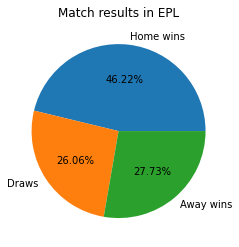

In [ ]:
plot_percentages(percentages, title='Match results in EPL')

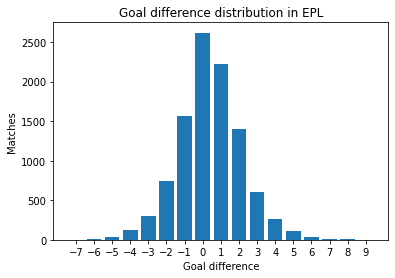

In [ ]:
plot_goals(goals, title='Goal difference distribution in EPL')

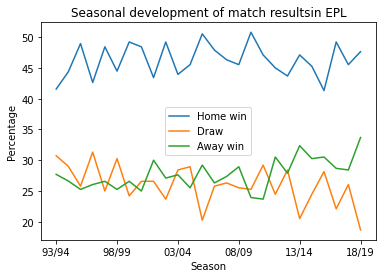

In [ ]:
plot_percentages_yearly(percentages_yearly)

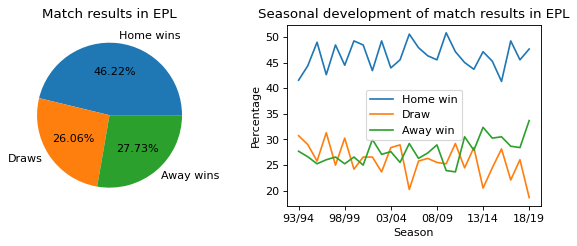

In [ ]:
plot_subgraph(percentages, percentages_yearly, title_percentages='Match results in EPL',
                  title_percentages_yearly='Seasonal development of match results in EPL',
                  x_tics_locs=np.arange(26, step=5),
                  x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19'])

In [ ]:
bl_files = ['BL_94.csv', 'BL_95.csv', 'BL_96.csv', 'BL_97.csv',
                 'BL_98.csv', 'BL_99.csv', 'BL_00.csv', 'BL_01.csv',
                 'BL_02.csv', 'BL_03.csv', 'BL_04.csv', 'BL_05.csv',
                 'BL_06.csv', 'BL_07.csv', 'BL_08.csv', 'BL_09.csv',
                 'BL_10.csv', 'BL_11.csv', 'BL_12.csv', 'BL_13.csv',
                 'BL_14.csv', 'BL_15.csv', 'BL_16.csv', 'BL_17.csv',
                 'BL_18.csv', 'BL_19.csv']

In [ ]:
dataset = get_dataset(bl_files)

In [ ]:
percentages = get_percentages(dataset)
percentages_yearly = get_percentages_yearly(bl_files)
goals = get_goals_distributions(dataset)

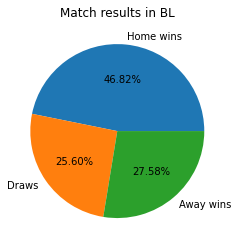

In [ ]:
plot_percentages(percentages, title='Match results in BL')

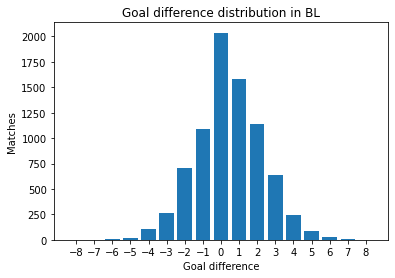

In [ ]:
plot_goals(goals, title='Goal difference distribution in BL')

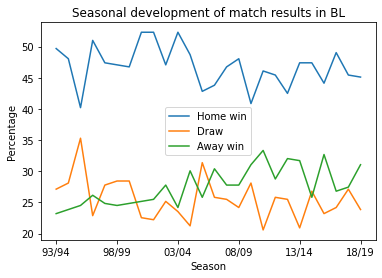

In [ ]:
plot_percentages_yearly(percentages_yearly, title='Seasonal development of match results in BL')

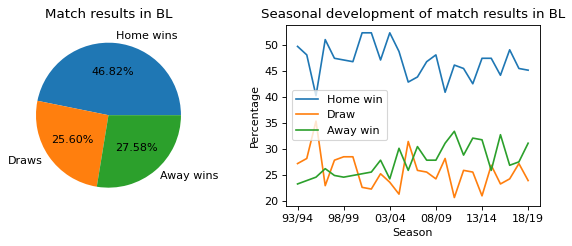

In [ ]:
plot_subgraph(percentages, percentages_yearly, title_percentages='Match results in BL',
                  title_percentages_yearly='Seasonal development of match results in BL',
                  x_tics_locs=np.arange(26, step=5),
                  x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19'])

In [ ]:
llpd_files = ['LLPD_94.csv', 'LLPD_95.csv', 'LLPD_96.csv', 'LLPD_97.csv',
                 'LLPD_98.csv', 'LLPD_99.csv', 'LLPD_00.csv', 'LLPD_01.csv',
                 'LLPD_02.csv', 'LLPD_03.csv', 'LLPD_04.csv', 'LLPD_05.csv',
                 'LLPD_06.csv', 'LLPD_07.csv', 'LLPD_08.csv', 'LLPD_09.csv',
                 'LLPD_10.csv', 'LLPD_11.csv', 'LLPD_12.csv', 'LLPD_13.csv',
                 'LLPD_14.csv', 'LLPD_15.csv', 'LLPD_16.csv', 'LLPD_17.csv',
                 'LLPD_18.csv', 'LLPD_19.csv']

In [ ]:
dataset = get_dataset(llpd_files)

In [ ]:
percentages = get_percentages(dataset)
percentages_yearly = get_percentages_yearly(llpd_files)
goals = get_goals_distributions(dataset)

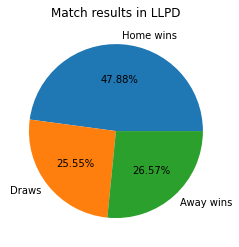

In [ ]:
plot_percentages(percentages, title='Match results in LLPD')

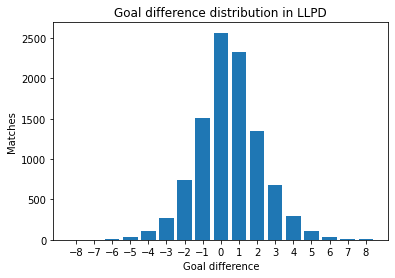

In [ ]:
plot_goals(goals, title='Goal difference distribution in LLPD')

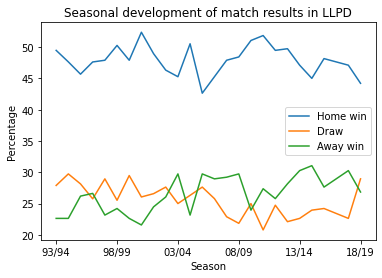

In [ ]:
plot_percentages_yearly(percentages_yearly, title='Seasonal development of match results in LLPD')

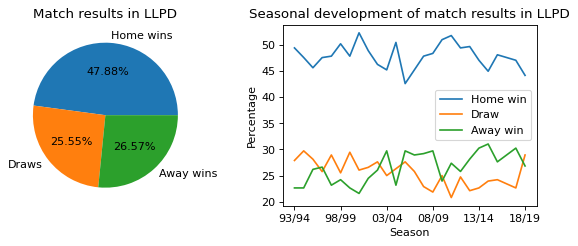

In [ ]:
plot_subgraph(percentages, percentages_yearly, title_percentages='Match results in LLPD',
                  title_percentages_yearly='Seasonal development of match results in LLPD',
                  x_tics_locs=np.arange(26, step=5),
                  x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19'])

In [ ]:
sa_files = ['SA_94.csv', 'SA_95.csv', 'SA_96.csv', 'SA_97.csv',
                 'SA_98.csv', 'SA_99.csv', 'SA_00.csv', 'SA_01.csv',
                 'SA_02.csv', 'SA_03.csv', 'SA_04.csv', 'SA_05.csv',
                 'SA_06.csv', 'SA_07.csv', 'SA_08.csv', 'SA_09.csv',
                 'SA_10.csv', 'SA_11.csv', 'SA_12.csv', 'SA_13.csv',
                 'SA_14.csv', 'SA_15.csv', 'SA_16.csv', 'SA_17.csv',
                 'SA_18.csv', 'SA_19.csv']

In [ ]:
dataset = get_dataset(sa_files)

In [ ]:
percentages = get_percentages(dataset)
percentages_yearly = get_percentages_yearly(sa_files)
goals = get_goals_distributions(dataset)

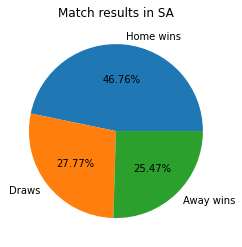

In [ ]:
plot_percentages(percentages, title='Match results in SA')


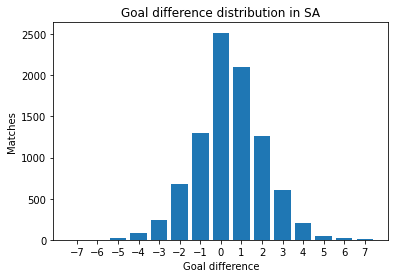

In [ ]:
plot_goals(goals, title='Goal difference distribution in SA')

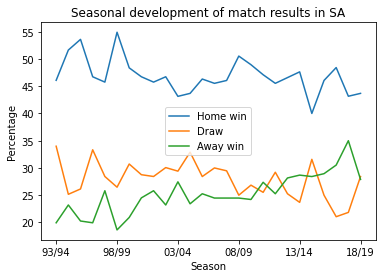

In [ ]:
plot_percentages_yearly(percentages_yearly, title='Seasonal development of match results in SA')

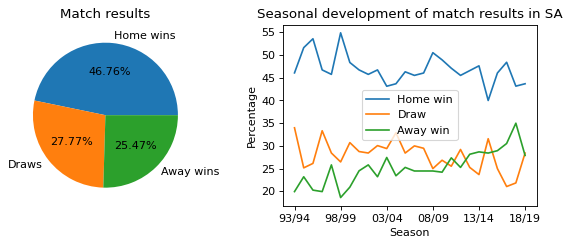

In [ ]:
plot_subgraph(percentages, percentages_yearly, title_percentages='Match results in SA',
                  title_percentages_yearly='Seasonal development of match results in SA',
                  x_tics_locs=np.arange(26, step=5),
                  x_ticks_labels=['93/94', '98/99', '03/04', '08/09', '13/14', '18/19'])

In [ ]:
dataset = pd.read_csv('BRA.csv')
dataset = dataset[['Res', 'HG', 'AG']]
dataset.columns = ['FTR', 'FTHG', 'FTAG']
dataset['FTR'].replace('H', 1, inplace=True)
dataset['FTR'].replace('A', 0, inplace=True)
dataset['FTR'].replace('D', 2, inplace=True)

In [ ]:
percentages = get_percentages(dataset)
percentages_yearly = get_percentages_yearly_bra('BRA.csv')
goals = get_goals_distributions(dataset)

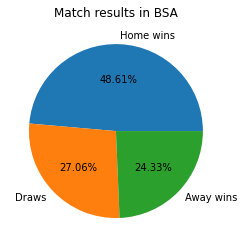

In [ ]:
plot_percentages(percentages, title='Match results in BSA')

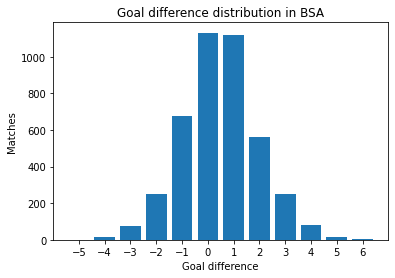

In [ ]:
plot_goals(goals, title='Goal difference distribution in BSA')

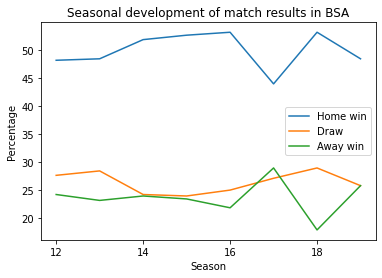

In [ ]:
plot_percentages_yearly(percentages_yearly, title='Seasonal development of match results in BSA',
                        x_tics_locs=np.arange(7, step=2),
                        x_ticks_labels=['12', '14', '16', '18'])

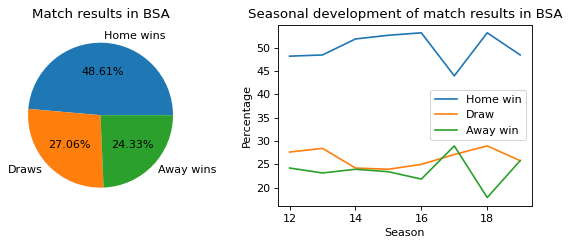

In [ ]:
plot_subgraph(percentages, percentages_yearly, title_percentages='Match results in BSA',
                  title_percentages_yearly='Seasonal development of match results in BSA',
                  x_tics_locs=np.arange(7, step=2),
                  x_ticks_labels=['12', '14', '16', '18'])